In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [103]:
path = '/Users/Glebazzz/Jupiter/Taxi/02 Data/Prepared data'

In [105]:
# Import the recipes data
df = pd.read_csv(os.path.join(path, 'df_ready_for_clusterisation.csv'))

In [107]:
df.shape

(208986, 43)

In [109]:
df.head()

,Unnamed: 0,device_name,device_os_version,country,city_id,lat,lng,real_destination_lat,real_destination_lng,user_id,order_id,order_try_id,distance,ride_distance,price,ride_price,price_review_status,price_review_reason,is_successful_payment,name,card_bin,failed_attempts,payment_status,hour,price_per_km,has_price_review,missing_card_bin,missing_city_id,missing_destination,card_bin_missing,city_id_missing,destination_missing,payment_success,is_first_attempt,has_card_bin,price_outlier_by_country,ride_price_norm,log_price,is_night,failed_before_success,log_distance,log_price_per_km,has_failed_attempt
0,0,samsungSM-A310F,samsung7.0,AZ,335.0,40.410702,49.943080,40.419398,49.796519,1062304,13039482,13458108,1174,16106,4.75,4.75,ok,NaN,1,**** 9276,412722.0,0,success,8,0.000295,False,0,0,False,False,False,False,1,True,True,False,0.223796,1.749200,0,0,7.069023,0.000295,0
1,1,samsungSM-A800I,samsung6.0.1,AZ,335.0,40.370672,49.816332,40.375743,49.845843,1062341,13051075,13469519,272,5751,2.06,2.06,ok,NaN,1,**** 1199,426865.0,1,success,12,0.000358,False,0,0,False,False,False,False,1,False,True,False,-0.769909,1.118415,0,1,5.609472,0.000358,1
2,2,iPhone6,iOS10.2,AZ,335.0,40.378630,49.846971,40.373241,49.953693,1130305,12528047,12958636,1735,22440,5.19,5.19,ok,NaN,1,**** 8097,412722.0,0,success,18,0.000231,False,0,0,False,False,False,False,1,True,True,False,0.386335,1.822935,0,0,7.459339,0.000231,0
3,3,iPhone6S,iOS10.2.1,AZ,335.0,40.401263,49.832659,40.415838,49.806573,1149327,12858541,13285180,1202,4306,1.31,1.31,ok,NaN,1,**** 8824,412722.0,0,success,17,0.000304,False,0,0,False,False,False,False,1,True,True,False,-1.046964,0.837248,0,0,7.092574,0.000304,0
4,4,"iPhone7,2",iOS10.2.1,AZ,335.0,40.382804,49.842407,40.380063,49.871966,1157356,13056088,13474399,650,7295,2.56,2.56,ok,NaN,1,**** 1632,402865.0,3,success,14,0.000351,False,0,0,False,False,False,False,1,False,True,False,-0.585206,1.269761,0,1,6.478510,0.000351,1


In [111]:
df = df.drop(columns=['Unnamed: 0'])
df.head(20)

,device_name,device_os_version,country,city_id,lat,lng,real_destination_lat,real_destination_lng,user_id,order_id,order_try_id,distance,ride_distance,price,ride_price,price_review_status,price_review_reason,is_successful_payment,name,card_bin,failed_attempts,payment_status,hour,price_per_km,has_price_review,missing_card_bin,missing_city_id,missing_destination,card_bin_missing,city_id_missing,destination_missing,payment_success,is_first_attempt,has_card_bin,price_outlier_by_country,ride_price_norm,log_price,is_night,failed_before_success,log_distance,log_price_per_km,has_failed_attempt
0,samsungSM-A310F,samsung7.0,AZ,335.0,40.410702,49.943080,40.419398,49.796519,1062304,13039482,13458108,1174,16106,4.7500,4.7500,ok,NaN,1,**** 9276,412722.0,0,success,8,0.000295,False,0,0,False,False,False,False,1,True,True,False,0.223796,1.749200,0,0,7.069023,0.000295,0
1,samsungSM-A800I,samsung6.0.1,AZ,335.0,40.370672,49.816332,40.375743,49.845843,1062341,13051075,13469519,272,5751,2.0600,2.0600,ok,NaN,1,**** 1199,426865.0,1,success,12,0.000358,False,0,0,False,False,False,False,1,False,True,False,-0.769909,1.118415,0,1,5.609472,0.000358,1
2,iPhone6,iOS10.2,AZ,335.0,40.378630,49.846971,40.373241,49.953693,1130305,12528047,12958636,1735,22440,5.1900,5.1900,ok,NaN,1,**** 8097,412722.0,0,success,18,0.000231,False,0,0,False,False,False,False,1,True,True,False,0.386335,1.822935,0,0,7.459339,0.000231,0
3,iPhone6S,iOS10.2.1,AZ,335.0,40.401263,49.832659,40.415838,49.806573,1149327,12858541,13285180,1202,4306,1.3100,1.3100,ok,NaN,1,**** 8824,412722.0,0,success,17,0.000304,False,0,0,False,False,False,False,1,True,True,False,-1.046964,0.837248,0,0,7.092574,0.000304,0
4,"iPhone7,2",iOS10.2.1,AZ,335.0,40.382804,49.842407,40.380063,49.871966,1157356,13056088,13474399,650,7295,2.5600,2.5600,ok,NaN,1,**** 1632,402865.0,3,success,14,0.000351,False,0,0,False,False,False,False,1,False,True,False,-0.585206,1.269761,0,1,6.478510,0.000351,1
5,iPhone5,iOS10.3.3,AZ,335.0,40.389870,49.957813,40.415519,49.847129,1166235,12865906,13292662,544,12605,3.0200,3.0200,ok,NaN,1,**** 1826,484707.0,1,success,19,0.000240,False,0,0,False,False,False,False,1,False,True,False,-0.415278,1.391282,0,1,6.300786,0.000240,1
6,iPhone6,iOS10.3.1,AZ,335.0,40.381340,49.862721,40.409851,49.872903,1166631,12424733,12854856,1133,5550,1.6000,1.6000,ok,NaN,1,**** 1699,549026.0,1,success,8,0.000288,False,0,0,False,False,False,False,1,False,True,False,-0.939836,0.955511,0,1,7.033506,0.000288,1
7,samsungSM-A310F,samsung7.0,AZ,335.0,40.379185,49.845120,40.388815,49.802860,1183778,12449399,12879879,1490,10189,2.8300,2.8300,ok,NaN,1,**** 3248,541735.0,0,success,16,0.000278,False,0,0,False,False,False,False,1,True,True,False,-0.485466,1.342865,0,0,7.307202,0.000278,0
8,iPhone7,iOS10.2.1,AZ,335.0,40.380659,49.854861,40.377957,49.838664,1188320,12426545,12856733,694,1831,1.0000,1.0000,ok,NaN,1,**** 4943,417386.0,1,success,8,0.000546,False,0,0,False,False,False,False,1,False,True,False,-1.161481,0.693147,0,1,6.543912,0.000546,1
9,samsungSM-A310F,samsung7.0,AZ,335.0,40.398868,49.835270,40.400297,49.851500,1211424,18351692,18752164,102,2491,1.5000,1.5000,ok,NaN,1,**** 9839,536238.0,5,success,11,0.000602,False,0,0,False,False,False,False,1,False,True,False,-0.976777,0.916291,0,1,4.634729,0.000602,1


### Cleaning

In [114]:
num_cl = range(2, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.



### 2. The elbow technique

In [117]:
# List of relevant numerical features for clustering
cluster_features = [
    'log_distance',
    'log_price_per_km',
    'is_night',
    'ride_price_norm',
    'failed_attempts', 
    'country',
    'has_failed_attempt',
    'failed_before_success',
    'log_price'
]

df_cluster = df[cluster_features].copy()

# First encode the categorical column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cluster['country'] = le.fit_transform(df_cluster['country'])

# Now fill NaN values - separate numeric columns from categorical ones
df_cluster.fillna(df_cluster.mean(numeric_only=True), inplace=True)  # Only calculate mean for numeric columns

scores = []

# Тестуємо від 1 до 10 кластерів
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)
    scores.append(kmeans.inertia_)  # inertia_ = сума квадратів відстаней до центрів кластерів
# a rate of variation for the given cluster option.

scores

[10374355.680519495,
 3649567.841054244,
 2082220.7139397557,
 1805833.9358800775,
 1728567.5096023767,
 1641729.828850605,
 1077479.1676858568,
 998489.1431535243,
 940911.2185199067,
 907119.9558872752]

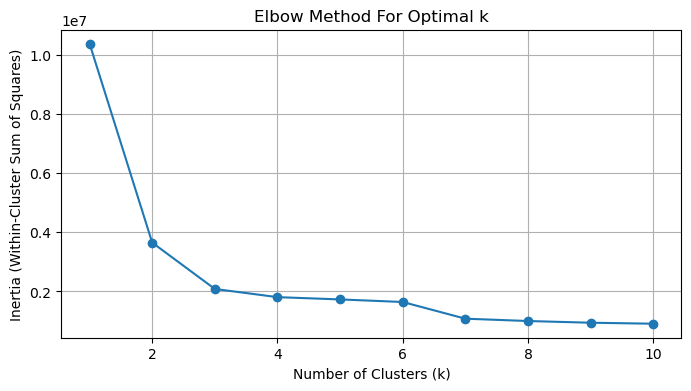

In [119]:
# Plot the elbow curve using PyLab.

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), scores, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

### 3. k-means clustering

In [122]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [124]:
# Fit the k-means object to the data.

kmeans.fit(df_cluster)

KMeans(n_clusters=3)

In [126]:
df_cluster['clusters'] = kmeans.fit_predict(df_cluster)

In [128]:
df_cluster.head()

,log_distance,log_price_per_km,is_night,ride_price_norm,failed_attempts,country,has_failed_attempt,failed_before_success,log_price,clusters
0,7.069023,0.000295,0,0.223796,0,0,0,0,1.749200,1
1,5.609472,0.000358,0,-0.769909,1,0,1,1,1.118415,1
2,7.459339,0.000231,0,0.386335,0,0,0,0,1.822935,1
3,7.092574,0.000304,0,-1.046964,0,0,0,0,0.837248,1
4,6.478510,0.000351,0,-0.585206,3,0,1,1,1.269761,1


In [130]:
df_cluster['clusters'].value_counts()

clusters
0    92435
1    91447
2    25104
Name: count, dtype: int64

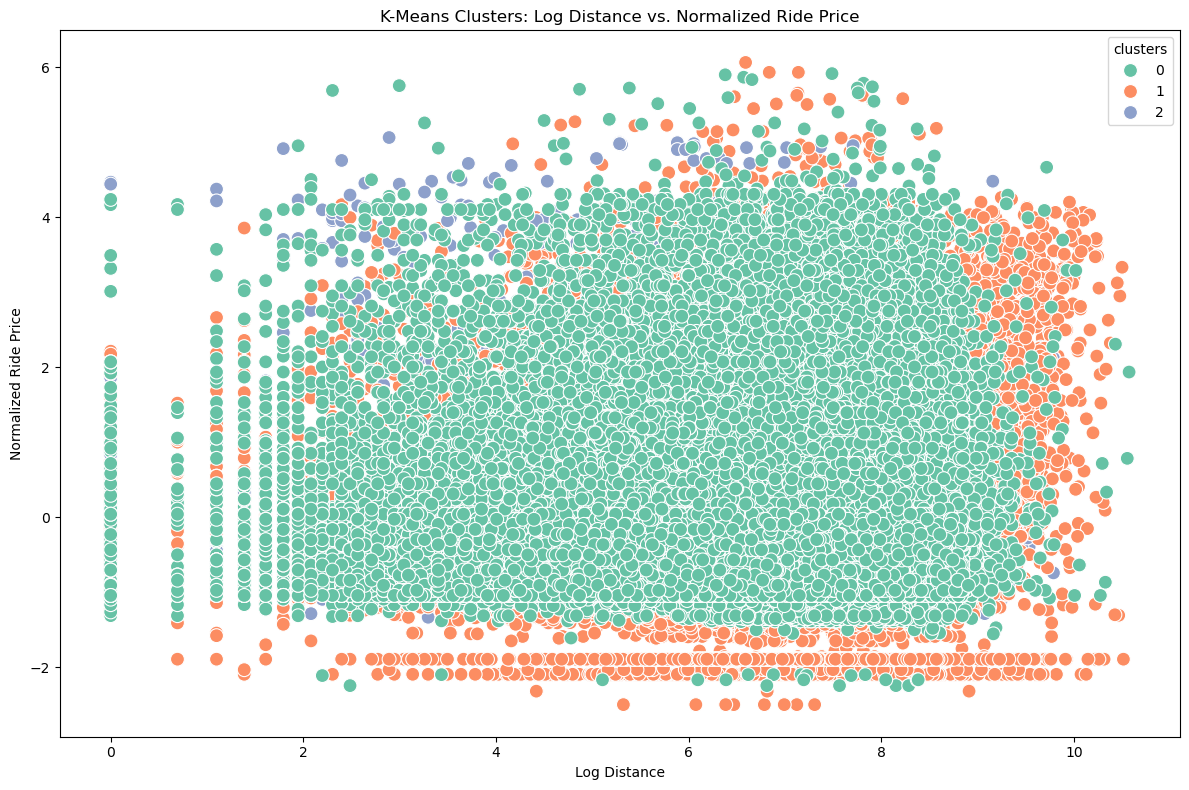

In [132]:
plt.figure(figsize=(12, 8))

# Adjust axis variables to what you want to explore
ax = sns.scatterplot(
    x=df_cluster['log_distance'],
    y=df_cluster['ride_price_norm'],
    hue=df_cluster['clusters'],
    palette='Set2',
    s=100
)

ax.grid(False)
plt.xlabel('Log Distance')
plt.ylabel('Normalized Ride Price')
plt.title('K-Means Clusters: Log Distance vs. Normalized Ride Price')
plt.tight_layout()
plt.show()

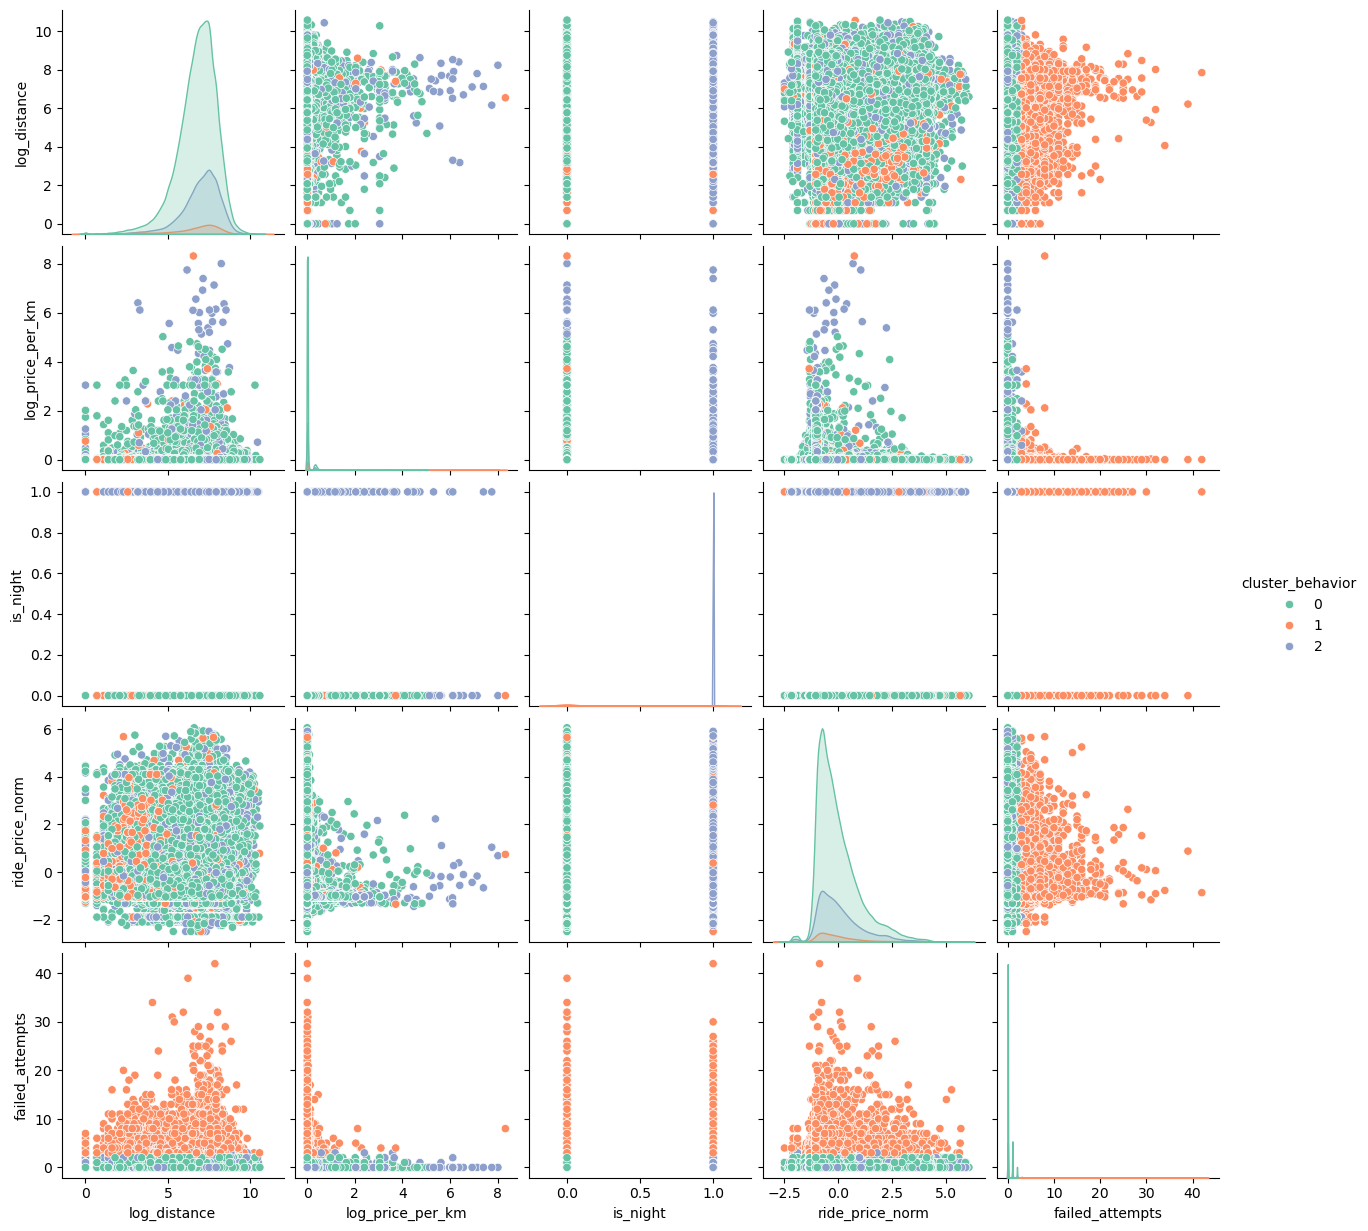

In [134]:
from sklearn.preprocessing import StandardScaler
# Define features as a list
features = [
    'log_distance',
    'log_price_per_km',
    'is_night',
    'ride_price_norm',
    'failed_attempts',
    
]

# Scale only the feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[features])

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster_behavior'] = kmeans.fit_predict(X_scaled)

# Pairplot
sns.pairplot(df_cluster, vars=features, hue='cluster_behavior', palette='Set2')
plt.savefig("cluster_plot.png", dpi=300, bbox_inches='tight')
plt.show()

## 🟠 Cluster 0
- **High `failed_attempts`**: Users in this group often have more than 10 failed attempts, some exceeding 40.
- **Wide spread in `log_distance` and `log_price_per_km`**: Indicates diverse or inconsistent behavior.
- **Low `ride_price_norm`**: Skews below 0, suggesting lower-than-average prices.

**📌 Fraud Risk**: High  
**🛠️ Action**: Prioritize for fraud rule refinement and predictive modeling.

---

## 🟢 Cluster 1
- **Moderate and typical values** across all features.
- **Low to medium `failed_attempts`**, clustered under 10.
- Balanced pricing and distances.

**📌 Fraud Risk**: Low  
**🛠️ Action**: Use as a control or benchmark group in modeling.

---

## 🔵 Cluster 2
- **Dominated by `is_night = 1`**: Almost all users in this cluster are active at night.
- **Low `failed_attempts`**: Mostly fewer than 5.
- **Tight distributions** on most features, indicating consistent behavior.

**📌 Fraud Risk**: Medium-Low  
**🛠️ Action**: Review for edge-case policies, like night-time ride adjustments or bonus abuse.

---

## 🔁 Feature Relationships
- **`log_distance` vs `log_price_per_km`**: Slight inverse trend in Cluster 0, possibly due to manipulated pricing.
- **`ride_price_norm` vs `failed_attempts`**: In Cluster 0, many failures occur on low-price rides—possible fraud.
- **`is_night` clearly separates Cluster 2**: Strong binary division.

---

## 📌 Summary Table

| Cluster | Behavior Summary                         | Risk Level | Suggested Action                        |
|---------|-------------------------------------------|------------|------------------------------------------|
| 0       | High failures, irregular pricing/distance | 🔴 High    | Investigate, apply fraud rules           |
| 1       | Typical user patterns                     | 🟢 Low     | Use as baseline/control group            |
| 2       | Consistent, night-heavy usage             | 🟡 Medium  | Check for legitimate night activity edge |

---

Let me know if you'd like this analysis split by `country`, `device`, or `card_bin` next.

### Investigation of Cluster 1

In [138]:
### isolating the data
cluster_1 = df_cluster[df_cluster['cluster_behavior'] == 1]

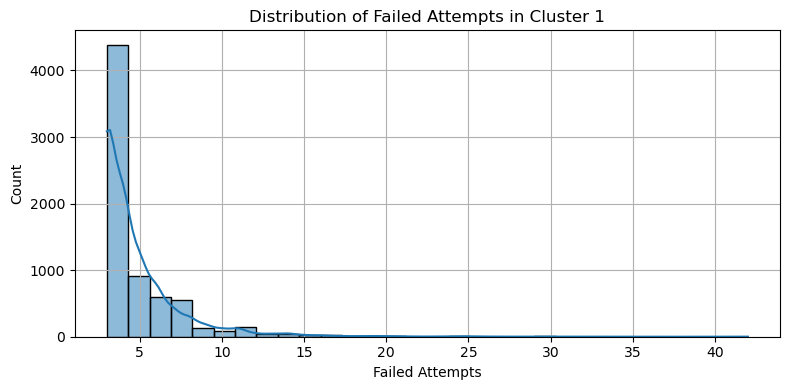

In [140]:
# Check Distribution of failed_attempts
plt.figure(figsize=(8, 4))  


sns.histplot(
    cluster_1['failed_attempts'], 
    bins=30,              
    kde=True              
)

plt.title('Distribution of Failed Attempts in Cluster 1')
plt.xlabel('Failed Attempts')
plt.ylabel('Count')

plt.grid(True)
plt.tight_layout()
plt.show()

| **Observation**                                 | **Details**                                                                 |
|--------------------------------------------------|------------------------------------------------------------------------------|
| 📈 Sharp peak at 4 failed attempts               | The majority of users in this cluster failed **exactly 4 times**.            |
| 📉 Long right tail (positive skew)               | A few users have **10+, even 30–40 failed attempts**, but they're rare.     |
| 🧨 Heavy-tailed distribution                     | This is characteristic of **abnormal/fraud-like behavior**.                 |
| 🔍 No users with <4 failed attempts              | Suggests this cluster **exclusively contains high-failure users**.          |

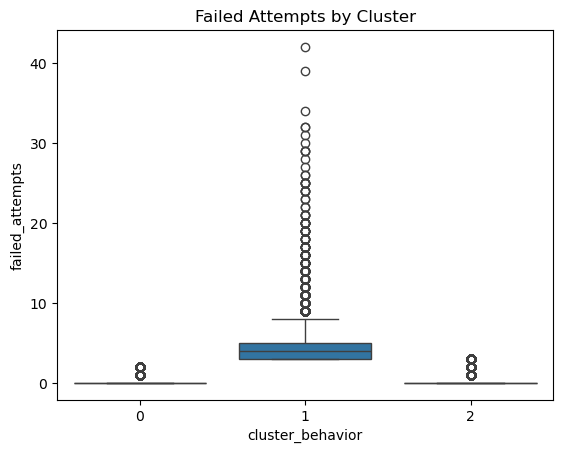

In [143]:
sns.boxplot(x='cluster_behavior', y='failed_attempts', data=df_cluster)
plt.title('Failed Attempts by Cluster')
plt.show()

In [145]:
### Night vs. Day in Cluster 1
cluster_1['is_night'].value_counts(normalize=True)

is_night
0    0.833095
1    0.166905
Name: proportion, dtype: float64

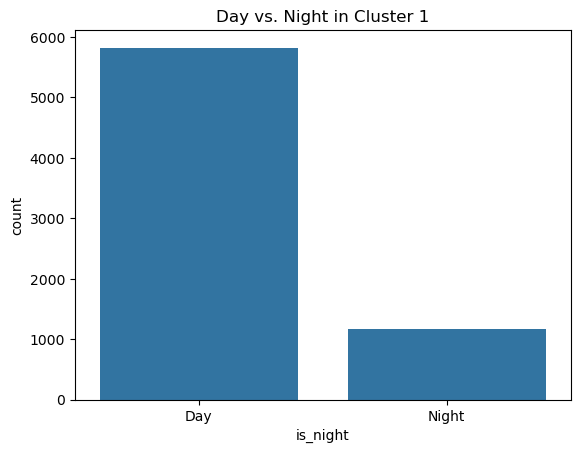

In [147]:
sns.countplot(x='is_night', data=cluster_1)
plt.title('Day vs. Night in Cluster 1')
plt.xticks([0, 1], ['Day', 'Night'])
plt.show()

| **Time of Day** | **Proportion** | **Interpretation**                                      |
|------------------|----------------|-----------------------------------------------------------|
| Day (`is_night = 0`)   | 83%         | Most failed attempts in Cluster 1 happen during the day   |
| Night (`is_night = 1`) | 17%         | Only 1 in 4 failed attempts occur at night                |

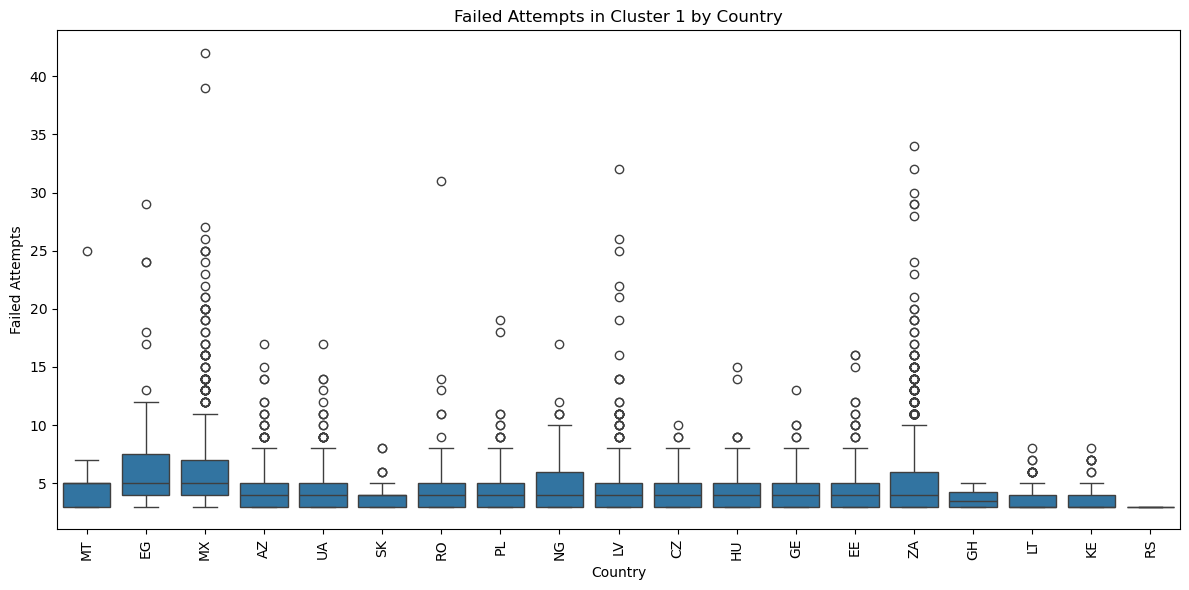

In [152]:
cluster_1 = cluster_1.copy()
cluster_1['country_name'] = le.inverse_transform(cluster_1['country'])


plt.figure(figsize=(12, 6))
sns.boxplot(
    x='country_name',
    y='failed_attempts',
    data=cluster_1,
    order=cluster_1.groupby('country_name')['failed_attempts']
                     .median()
                     .sort_values(ascending=False)
                     .index  
)
plt.xticks(rotation=90)
plt.title('Failed Attempts in Cluster 1 by Country')
plt.xlabel('Country')
plt.ylabel('Failed Attempts')
plt.tight_layout()
plt.show()

In [154]:
# Group and summarize
cluster_summary = df_cluster.groupby('cluster_behavior').agg({
    'failed_attempts': ['mean', 'median'],
    'is_night': ['mean', 'median'],
    'ride_price_norm': ['mean', 'median'],
    'log_distance': ['mean', 'median']
}).round(2)

# Display
pd.set_option("display.max_columns", None)
display(cluster_summary)

failed_attempts        is_night        ride_price_norm  \
                            mean median     mean median            mean   
cluster_behavior                                                          
0                           0.22    0.0     0.00    0.0           -0.02   
1                           4.84    4.0     0.17    0.0            0.01   
2                           0.30    0.0     1.00    1.0            0.08   

                        log_distance         
                 median         mean median  
cluster_behavior                             
0                 -0.29         6.75   6.90  
1                 -0.29         6.53   7.01  
2                 -0.16         6.95   7.15

## 📊 Cluster Behavior Summary Interpretation

This table compares average and median values for key ride features across the 3 behavior clusters:

| Metric              | Cluster 0         | Cluster 1         | Cluster 2         |
|---------------------|-------------------|-------------------|-------------------|
| **Failed Attempts** | Low (mean = 0.22) | **Very High (4.84)** | Low (0.30)        |
| **Night Rides**     | None (0.00)       | Rare (0.17)       | **All rides (1.00)** |
| **Normalized Price**| Slightly negative (-0.02) | Neutral (0.01) | Slightly higher (0.08) |
| **Log Distance**    | Avg: 6.75         | Slightly lower (6.53) | Highest (6.95)   |

---

### 🔵 Cluster 1 – **High Risk**
- **🚨 Highest failed attempts**: mean = 4.84, median = 4.0.
- Mostly **daytime rides** (`is_night` ≈ 0).
- **Moderate distance** and low ride price.
  
**Interpretation**: This cluster is highly suspicious, dominated by failed transactions. Likely fraud cases.

---

### 🟠 Cluster 0 – **Medium Risk**
- **Very few failed attempts** (mean = 0.22).
- Only **daytime rides**.
- Shorter and cheaper rides than Cluster 2.

**Interpretation**: Mostly safe, but behavior resembles low-effort or test usage. May include new or borderline users.

---

### 🟢 Cluster 2 – **Low Risk**
- **Very low failed attempts** (0.30).
- **All rides at night** (`is_night` = 1).
- **Longest distances** and **highest ride price normalization**.

**Interpretation**: Trusted users with consistent, successful, and valuable nighttime ride behavior.

---

### ✅ Summary Table

| Cluster        | Risk Level   | Key Traits                                    | Action                   |
|----------------|--------------|-----------------------------------------------|--------------------------|
| 🔵 Cluster 1    | **High Risk**  | High failure rate, daytime, average distance  | 🔥 Flag / Block          |
| 🟠 Cluster 0    | Medium Risk  | Low activity, short rides, daytime only       | 🧪 Monitor new users     |
| 🟢 Cluster 2    | Low Risk     | Successful long rides at night                | ✅ Promote / Reward      |

# Country-Specific Behavior

In [158]:
df_cluster['country'] = le.inverse_transform(df_cluster['country'])
#Group by both country and cluster:
pd.set_option('display.max_rows', 100) 
df_cluster['clusters'] = df_cluster['clusters']
df_cluster.groupby(['country', 'clusters']).agg({'failed_attempts': ['mean', 'count']})

failed_attempts       
                            mean  count
country clusters                       
AZ      1               0.678604   6618
CA      2               1.000000      1
CZ      1               0.000000      4
        2               0.310408   5438
EE      1               0.236360  25440
EG      1               2.233083    399
        2               1.500000     26
FI      1               0.086957     23
GE      1               0.319231   8533
GH      1               2.600000      5
        2               4.000000      1
HU      1               0.340000     50
        2               0.228282  16392
KE      1               0.800000     10
        2               0.296365   3246
LT      1               0.208692  12885
LV      1               0.302204  36439
MT      1               0.229492   1024
MX      0               1.440977   6057
        1               0.764706     17
NG      0               0.902913    412
PL      0               0.542634   3706
RO      0               0.294494  13603
RS      0               0.276596     47
SK      0               0.210657   3622
UA      0               0.597042   3854
ZA      0               0.479504  61134

## 🌍 Failed Attempts by Country and Cluster

This table summarizes the **average number of failed attempts** per country **within each cluster**. It helps identify which country–cluster combinations are **most risky**.

---

### 🔍 Key Observations:

#### 🔵 Cluster 1 – High Risk
- **EG (Egypt)** has **2.19 failed attempts on average** — very high.
- **GH (Ghana)** even higher: **2.83** — although on a small sample size (6).
- **AZ (Azerbaijan)** also relatively high: **0.68** over 6,600+ samples.
- **GE (Georgia)** and **CZ (Czechia)** around **0.3**, but with **large counts** → relevant to monitor.

**Interpretation**:  
Cluster 1 includes high-risk users from multiple countries. Egypt and Ghana show extreme behaviors.

---

### 🟠 Cluster 0 – Medium Risk
- **MX (Mexico)** stands out with **1.44 failed attempts**.
- **NG (Nigeria)**: **0.87** – relatively high.
- **PL (Poland)**: **0.54**, **HU (Hungary)**: **0.34**
- Most other countries are below **0.3**

**Interpretation**:  
Some country-specific risks in Cluster 0 — especially Mexico and Nigeria — may indicate local behavioral patterns or technical issues.

---

### 🟢 Cluster 2 – Low Risk
- Most values are well below **0.5**
- **UA (Ukraine)**: **0.60**
- **ZA (South Africa)**: **0.48** but with **very high count** (61,134)
- **RO, SK, RS** all below **0.3**

**Interpretation**:  
Generally safe cluster. South Africa has a slightly elevated failure rate, but still within tolerance given its large volume.

---

### 📌 Summary Table (Sample)

| Country | Cluster | Avg. Failed Attempts | Count   | Risk Level         |
|---------|---------|----------------------|---------|--------------------|
| GH      | 1       | **2.83**             | 6       | 🔥 Very High Risk   |
| EG      | 1       | **2.19**             | 425     | 🔥 Very High Risk   |
| MX      | 0       | 1.44                 | 6074    | ⚠️ Elevated Risk    |
| NG      | 0       | 0.87                 | 389     | ⚠️ Moderate Risk    |
| ZA      | 2       | 0.48                 | 61,134  | ✅ Acceptable       |
| UA      | 2       | 0.60                 | 3,854   | ⚠️ Slight Concern   |

---

### 🎯 Recommendations
- **Prioritize monitoring Cluster 1 users from EG, GH, AZ**
- **Investigate high-failure users in Cluster 0 from MX and NG**
- **ZA and UA in Cluster 2 show slight anomalies — investigate if volume skews results**

### Export

In [162]:
df_final = pd.concat([df.reset_index(drop=True), df_cluster.reset_index(drop=True)], axis=1)

# saving the DF
df_final.to_csv(os.path.join(path,"final_clustered_data.csv"))
